<a href="https://colab.research.google.com/github/MOsamaAS/CodexCue/blob/main/Spam_Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File Setup

Load File

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/CodexCue/Spam Email Classification/Dataset/emails.csv'

Read File

In [ ]:
emails_df = pd.read_csv(file_path)

emails_df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Check for Missing Values

In [ ]:
missing_values = emails_df.isnull().sum().sum()

# Data Analysis

Scaling the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = emails_df.drop(columns=['Email No.', 'Prediction'])
y = emails_df['Prediction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

missing_values, X_train_scaled.shape, X_test_scaled.shape

(0, (4137, 3000), (1035, 3000))

Setup of Three Predictive Models (Logistic Regression, Decision Tree, SVM)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)

# Train the models
log_reg.fit(X_train_scaled, y_train)
dec_tree.fit(X_train, y_train)  # Decision tree doesn't require scaling
svc.fit(X_train_scaled, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test_scaled)
dec_tree_pred = dec_tree.predict(X_test)
svc_pred = svc.predict(X_test_scaled)

# Evaluate the models
models = {
    "Logistic Regression": log_reg_pred,
    "Decision Tree": dec_tree_pred,
    "Support Vector Machine": svc_pred
}

Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the models
evaluation_metrics = {}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions) * 100
    recall = recall_score(y_test, predictions) * 100
    f1 = f1_score(y_test, predictions) * 100

    evaluation_metrics[model_name] = {
        "Accuracy": round(accuracy, 1),
        "Precision": round(precision, 1),
        "Recall": round(recall, 1),
        "F1 Score": round(f1, 1)
    }

# Printing evaluation metrics in the desired format
for model_name, metrics in evaluation_metrics.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Logistic Regression:
  Accuracy: 97.0
  Precision: 92.6
  Recall: 97.3
  F1 Score: 94.9
Decision Tree:
  Accuracy: 92.3
  Precision: 86.2
  Recall: 86.8
  F1 Score: 86.5
Support Vector Machine:
  Accuracy: 94.7
  Precision: 99.6
  Recall: 81.8
  F1 Score: 89.8


# Data Visualization

Spam vs Non-Spam

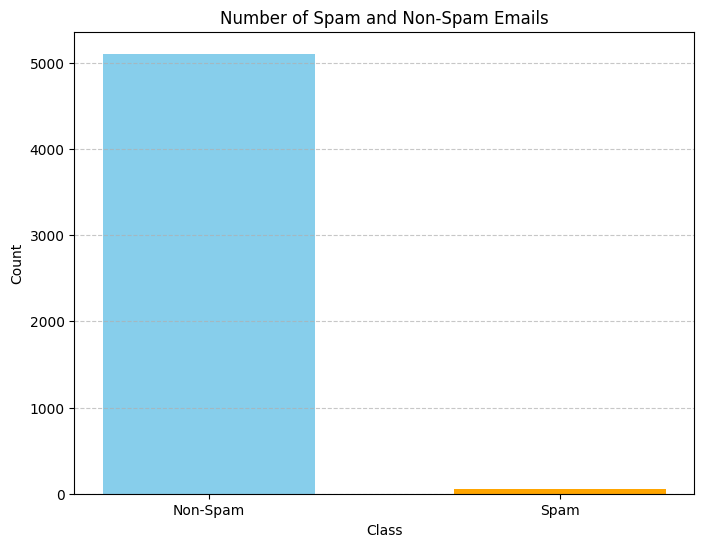

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = emails_df['spam'].value_counts()

# Filter out counts for only 'Non-Spam' (0) and 'Spam' (1)
non_spam_count = class_counts.get(0, 0)
spam_count = class_counts.get(1, 0)

# Define positions and counts for the bars
positions = [.35, 1.67]
counts = [non_spam_count, spam_count]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(positions, counts, color=['skyblue', 'orange'])
plt.title('Number of Spam and Non-Spam Emails')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=positions, labels=['Non-Spam', 'Spam'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Comparing Evaluation Metrics of Each Model

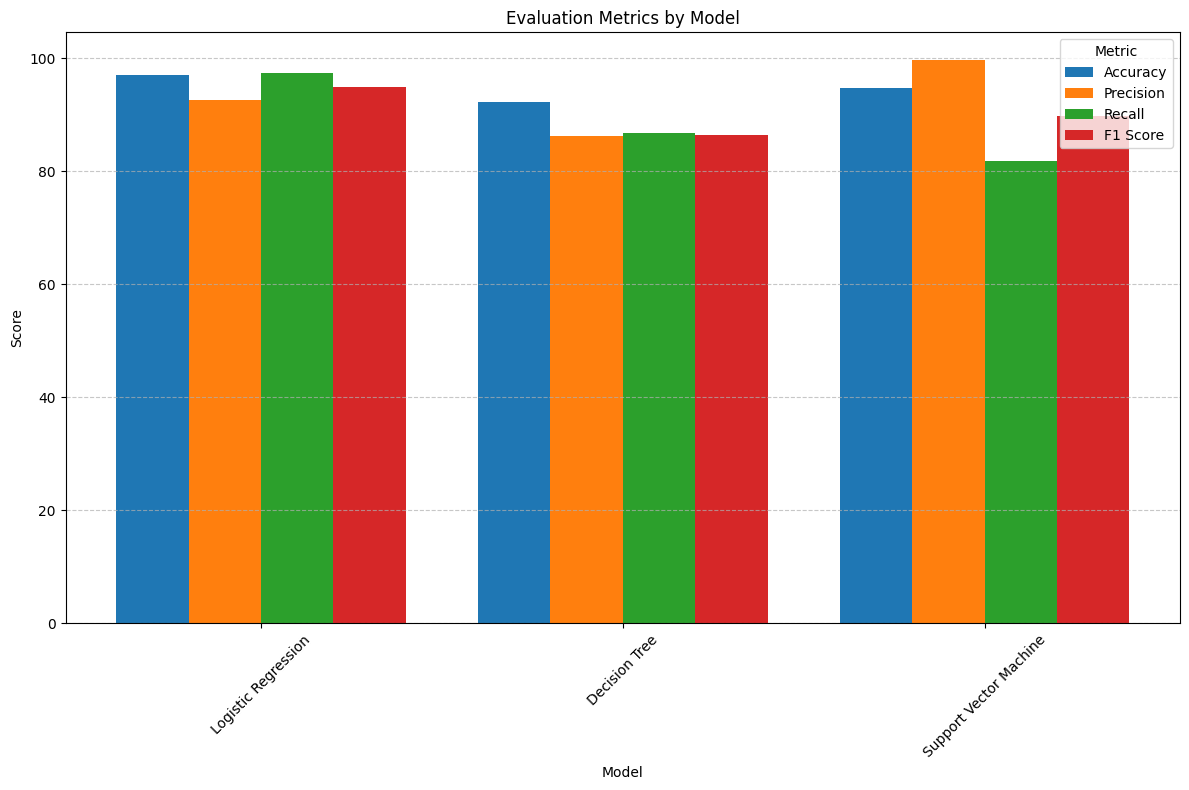

In [ ]:
import numpy as np

# Prepare data for plotting
models = list(evaluation_metrics.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
n_models = len(models)
n_metrics = len(metrics)
bar_width = 0.2
x = np.arange(n_models)  # The label locations

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric
for i, metric in enumerate(metrics):
    values = [evaluation_metrics[model][metric] for model in models]
    ax.bar(x + i * bar_width, values, bar_width, label=metric)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x + (n_metrics - 1) * bar_width / 2)
ax.set_xticklabels(models)
ax.legend(title='Metric')

# Add grid and show plot
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Converting to PDF

In [ ]:
!pip install nbconvert

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Spam_Email_Classification.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Spam_Email_Classification.ipynb to pdf
[NbConvertApp] Support files will be in Spam_Email_Classification_files/
[NbConvertApp] Making directory ./Spam_Email_Classification_files
[NbConvertApp] Making directory ./Spam_Email_Classification_files
[NbConvertApp] Writing 68319 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 123354 bytes to /content/drive/MyDrive/Colab Notebooks/Spam_Email_Classification.pdf
